# Excercse MNIST
1. complete the training process
2. Get the MAX accuracy and MIN loss of your final model

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, models, layers, utils, activations, losses, optimizers, metrics
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
tf.__version__

'2.8.0'

In [ ]:
# Define Parameters
num_classes = 10
img_size = 28

#### Prepare Data

In [ ]:
# download from google drive
!gdown --id '1Pb9lxPjXBEq4O8KMzdemqehRtp_jr-Wy' --output mnist.npz

Downloading...
From: https://drive.google.com/uc?id=1Pb9lxPjXBEq4O8KMzdemqehRtp_jr-Wy
To: /content/mnist.npz
100% 11.5M/11.5M [00:00<00:00, 195MB/s]


In [ ]:
# Load Data from file
with np.load('mnist.npz', allow_pickle=True) as f:
    x_train, y_train = f['x_train'], f['y_train']
    x_test = f['x_test']

# Data shape
x_train.shape, y_train.shape, x_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28))

In [ ]:
# split dataset
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

x_train.shape, x_val.shape, x_train.shape, x_val.shape

((48000, 28, 28), (12000, 28, 28), (48000, 28, 28), (12000, 28, 28))

In [ ]:
# Flatten img to a vector
x_train = x_train.reshape(x_train.shape[0], -1)
x_val = x_val.reshape(x_val.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

# normalization to 0 ~ 1
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

# one hot encoding
y_train = utils.to_categorical(y_train, num_classes=num_classes)
y_val = utils.to_categorical(y_val, num_classes=num_classes)

x_train.shape, x_val.shape, y_train.shape, y_val.shape

((48000, 784), (12000, 784), (48000, 10), (12000, 10))

In [ ]:
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

#### Build Model

In [ ]:
# Build your own model
model = models.Sequential([
                           layers.Dense(32, activation='relu', input_shape=(img_size*img_size,)),
                           layers.Dense(32, activation='relu'),
                           layers.Dense(64, activation='relu'),
                           layers.Dense(64, activation='relu'),
                           layers.Dense(10, activation='softmax'),
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 33,098
Trainable params: 33,098
Non-trainable params: 0
_________________________________________________________________


#### Training

In [ ]:
# Setting for training
model.compile(loss=losses.categorical_crossentropy, # loss function
              optimizer=optimizers.SGD(),
              metrics=['accuracy']
              )

In [ ]:
logs = model.fit(x_train, y_train,
                batch_size=128,
                epochs=10,
                validation_data=(x_val, y_val))

Epoch 1/10
375/375 [==============================] - 4s 5ms/step - loss: 1.8936 - accuracy: 0.4304 - val_loss: 1.1096 - val_accuracy: 0.7027
Epoch 2/10
375/375 [==============================] - 1s 4ms/step - loss: 0.7531 - accuracy: 0.7794 - val_loss: 0.5757 - val_accuracy: 0.8253
Epoch 3/10
375/375 [==============================] - 1s 4ms/step - loss: 0.5044 - accuracy: 0.8510 - val_loss: 0.4599 - val_accuracy: 0.8649
Epoch 4/10
375/375 [==============================] - 1s 4ms/step - loss: 0.4205 - accuracy: 0.8772 - val_loss: 0.4054 - val_accuracy: 0.8822
Epoch 5/10
225/375 [=================>............] - ETA: 0s - loss: 0.3713 - accuracy: 0.8905

KeyboardInterrupt: ignored

In [ ]:
score = model.evaluate(x_val, y_val, verbose=0)
print(f'test loss: {score[0]}, test acc: {score[1]}')

test loss: 0.245595782995224, test acc: 0.9265000224113464


In [ ]:
prediction = model.predict(x_val[:1])
print('model prediction: ', prediction)
print('max probabolity index: ', np.argmax(prediction, axis=-1))

model prediction:  [[4.5328110e-05 7.2809307e-06 2.2559692e-03 6.2928791e-03 6.0994266e-06
  1.9893040e-04 1.4188016e-07 9.8944634e-01 9.8284516e-05 1.6488490e-03]]
max probabolity index:  [7]


In [ ]:
history = logs.history
print(history)

{'loss': [1.9372986555099487, 0.8585370182991028, 0.5100427269935608, 0.4055003523826599, 0.3555108904838562, 0.32464736700057983, 0.3018020689487457, 0.2832580804824829, 0.26721635460853577, 0.2536136209964752], 'accuracy': [0.36145833134651184, 0.7551041841506958, 0.8480416536331177, 0.8811458349227905, 0.8962291479110718, 0.9048125147819519, 0.9116041660308838, 0.9165624976158142, 0.9209166765213013, 0.9243124723434448], 'val_loss': [1.315775752067566, 0.6007142066955566, 0.45132794976234436, 0.387428343296051, 0.34911975264549255, 0.3281558156013489, 0.3093354403972626, 0.29273849725723267, 0.2765825092792511, 0.2630770802497864], 'val_accuracy': [0.6370833516120911, 0.8228333592414856, 0.8646666407585144, 0.8852499723434448, 0.8956666588783264, 0.9024999737739563, 0.909333348274231, 0.9131666421890259, 0.9194166660308838, 0.9223333597183228]}


Text(0.5, 1.0, 'accuracy')

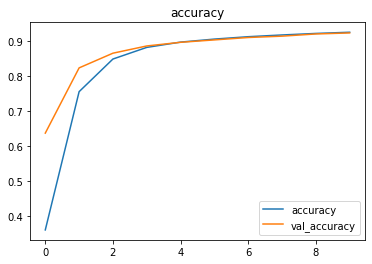

In [ ]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('accuracy')

#### Get max accuracy from history['val_accuracy']

In [ ]:
max_acc = np.max(history['val_accuracy'])
print(max_acc)

0.9223333597183228


Text(0.5, 1.0, 'loss')

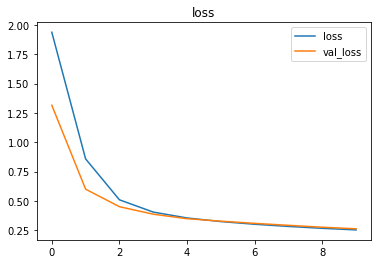

In [ ]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('loss')

#### Get min loss from history['val_loss']

In [ ]:
min_loss = np.min(history['val_loss'])
print(min_loss)

0.2630770802497864


#### Metrics

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_true = np.argmax(y_val, axis=-1) # Ground Truth
y_pred = np.argmax(model.predict(x_val), axis=-1) # Model prediction
print(y_val.shape, y_pred.shape)


(10000,) (10000,)


In [ ]:
# Classification Report
# Ref: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
label_names = [str(i) for i in range(10)] # ['0' ~  '9']
print(classification_report(y_true, y_pred, target_names=label_names))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       980
           1       0.98      0.98      0.98      1135
           2       0.92      0.92      0.92      1032
           3       0.94      0.89      0.91      1010
           4       0.90      0.93      0.92       982
           5       0.90      0.89      0.90       892
           6       0.93      0.95      0.94       958
           7       0.92      0.94      0.93      1028
           8       0.89      0.90      0.89       974
           9       0.92      0.89      0.90      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



In [ ]:
# Confusion Matrix: 
# Row: Truth
# Column: Prediction
# Ref: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
print(confusion_matrix(y_true, y_pred))

[[ 952    0    1    1    2   10   10    2    2    0]
 [   0 1110    4    2    0    1    3    2   13    0]
 [   9    1  945    8   10    1   14   17   24    3]
 [   4    2   27  899    1   33    2   14   23    5]
 [   1    2    6    1  914    0   15    1    4   38]
 [   7    2    3   22    9  798   11    8   24    8]
 [   8    3    6    0   11   14  909    1    6    0]
 [   1    6   24    2    6    0    0  966    5   18]
 [   5    5   10   16   12   23   10   11  874    8]
 [   8    7    2    7   48    9    0   25    5  898]]


#### Generate file for Kaggle

In [ ]:
df = pd.DataFrame()
df['Id'] = [str(i) for i in range(len(x_test))]
predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis=-1)
df['Category'] = predictions
df.to_csv('result.csv', index=None)
df

,Id,Category
0,0,6
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
9995,9995,0
9996,9996,0
9997,9997,0
9998,9998,0
